# Monte Carlo Method : State - Value estimation

**공부할 내용**
1. state, action, reward 가 무엇인가요?
2. Return이 무엇인가요?
3. State-Value Function 이란?
4. Action-Value Function 이란?
5. Policy 란?

**사용할 환경 : 자주 만날 Frozen Lake**

![좋은거](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSKrspq5EvLOC2Rv8dfsw1OVqD1WjN5YsmgAHVCVn3x8zLhM5Y8&usqp=CAU)


# 필요 라이브러리 불러오기.

In [ ]:
!pip install gym

In [ ]:
import numpy as np
import gym

In [ ]:
# gym.envs.registration.register(
#     id="FrozenLake-v3", entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name': '4x4', 'is_slippery': False}
# )

gym.envs.registration.register(
    id="FrozenLake-v8", entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '8x8', 'is_slippery': True}
)

In [ ]:
# env = gym.make('FrozenLake-v3')
env = gym.make('FrozenLake-v8')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Discrete(64)
action space: Discrete(4)


## Total 연습!

1. 총 10000번의 episode를 시행한다! ( 결과를 보고 2만번으로 늘려서도 진행해본다)
    1. 하나의 episode가 진행 중일 땐,
        * states = [] # state 기록!
        * rewards = [] # reward 기록!
    2. 하나의 episode가 종료되면
        * returns = [] # $G_t$ 제작, 기록!
        * (사실 이 단계에서 $V(s)$를 업데이트 해야 좋음 - episode마다 업데이트가 되니까!)
2. episode가 끝나면
    * state_n : state별 방문횟수 업데이트 하는 넘파이 어레이 제작
    * V : state별 가치값이 저장될 0으로 가득찬 array제작
    * states, state_n, returns 이용하여 V업데이트!

$$V(S_t) = V(S_t) + {1\over{N(S_t)}}(G_t - V(S_t))$$

In [ ]:
%%time
####### Your Code Here ##########

states = []
returns = []

gamma = 0.9

for i in range(30000) :
    # 환경을 초기화 하며 초기 state 를 s0에 선언하시오.
    # rewards 와 temp_returns 에 list를 만들어두시오.
    s0 = env.reset()
    rewards = []
    temp_returns = []

    while True :
        # 랜덤한 액션을 하나 선택하여 a0에 담으시오.
        a0 = env.action_space.sample()
        
        # 환경과 상호작용 하면서, s1, r1, done, _ 를 선언하시오.
        s1, r1, done, _ = env.step(a0)
        
        # states에 s0을 담고 rewards에 r1을 담으시오.
        states.append(s0)
        rewards.append(r1)

        if done == True :
        # 환경닫기
            break
        # 다음 단계의 s0에 s1의 값을 옮겨 선언하시오.
        s0 = s1

    ### 이 episode에 대해서, rewards를 이용하여 Return을 계산하여 temp_returns에 담고
    ### temp_returns.append()아님 주의! insert!
    ### returns = returns + temp_returns
    Gt = 0
    for r in rewards[::-1]:
      Gt = r + gamma * Gt
      temp_returns.insert(0, Gt)

    returns = returns + temp_returns


CPU times: user 1min 47s, sys: 1.46 s, total: 1min 48s
Wall time: 1min 48s


In [ ]:
len(states), len(returns)

(970688, 970688)

In [ ]:
states[:4], returns[:4]

([0, 8, 8, 16], [0.0, 0.0, 0.0, 0.0])

In [ ]:
# state_n = np.zeros(shape=(16,))   # state의 방문횟수가 담길 1차원 어레이 제작. 0으로 가득 차 있어야 함.
# V =  np.zeros(shape=(16,)) # State의 가치가 담길 1차원 어레이 제작. 0으로 일단 가득차있어야 함.
# #state, returns 이용 하여 V를 제작하자!
# for t, state in enumerate(states):
#   state_n[state] = state_n[state] + 1
#   n_s = state_n[state]
#   V[state] = V[state] + (1/n_s) * (returns[t] - V[state])

# V.reshape([4,4])
state_n = np.zeros(shape=(64,))
V = np.zeros(shape=(64,))
#state, returns 이용할 것
for t, state in enumerate(states):
    state_n[state] = state_n[state] + 1
    n_s = state_n[state]
   # V 를 업데이트 하는 코드
    V[state] = V[state] + (1/n_s)*(returns[t] - V[state])
V.reshape([8,8])

array([[2.70883791e-05, 4.52008849e-05, 9.07781468e-05, 1.63205296e-04,
        4.13671847e-04, 9.54824158e-04, 1.86178991e-03, 1.82906301e-03],
       [1.98809676e-05, 2.89367807e-05, 6.32422040e-05, 1.30352047e-04,
        4.25313382e-04, 1.14187081e-03, 2.10651968e-03, 3.15864517e-03],
       [1.76863551e-05, 1.75951943e-05, 1.51223782e-05, 0.00000000e+00,
        6.56090638e-04, 1.45471587e-03, 3.21120968e-03, 6.63325381e-03],
       [5.16062858e-06, 1.02040252e-05, 1.84262117e-05, 6.48393647e-05,
        4.99234542e-04, 0.00000000e+00, 6.96978649e-03, 1.70491006e-02],
       [8.66730062e-07, 1.52069925e-07, 5.08610008e-07, 0.00000000e+00,
        1.04258623e-03, 5.32851301e-03, 1.02498653e-02, 4.10437550e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.32719728e-03, 9.59483070e-03, 0.00000000e+00, 9.76956168e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.24828409e-02, 0.00000000e+00, 3.

In [ ]:
import matplotlib.pyplot as plt
def plot_values(V):
	# reshape value function
	V_sq = np.reshape(V, (8,8))

	# plot the state-value function
	fig = plt.figure(figsize=(8, 8))
	ax = fig.add_subplot(111)
	im = ax.imshow(V_sq, cmap='cool')
	for (j,i),label in np.ndenumerate(V_sq):
	    ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
	plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
	plt.title('State-Value Function')
	plt.show()

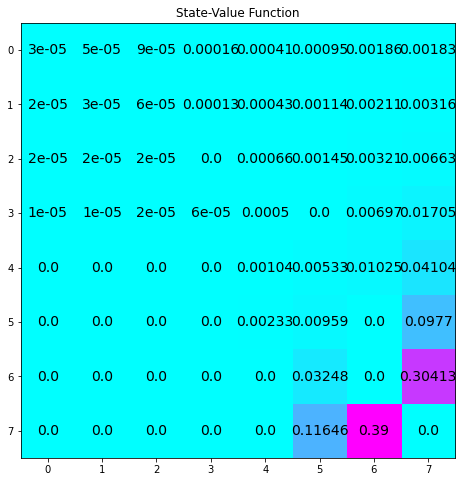

In [ ]:
plot_values(V)

# 자! State-Value 바탕으로 움직인다면?

바꿔 말해, Policy를 제작한다면?

$$\pi'(s) = argmax_{a}(R^a_s + P^a_{ss'}V(s') )$$